In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
employee_ids = [f"E{str(i).zfill(3)}" for i in range(1, 31)]
dates = pd.date_range(start="2025-06-01", periods=30)
data = []

for emp_id in employee_ids:
    for date in dates:
        hours = round(np.random.uniform(4, 10), 2)
        if random.random() < 0.02:
            hours = round(np.random.uniform(0, 2), 2)  
        elif random.random() < 0.02:
            hours = round(np.random.uniform(12, 15), 2)  
        data.append([emp_id, date, hours])

df = pd.DataFrame(data, columns=["EmployeeID", "Date", "WorkingHours"])
df.head()

,EmployeeID,Date,WorkingHours
0,E001,2025-06-01,9.08
1,E001,2025-06-02,7.20
2,E001,2025-06-03,8.12
3,E001,2025-06-04,7.84
4,E001,2025-06-05,9.02


In [4]:
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nWorking Hours Stats:\n", df["WorkingHours"].describe())

Data shape: (900, 3)

Data types:
 EmployeeID              object
Date            datetime64[ns]
WorkingHours           float64
dtype: object

Missing values:
 EmployeeID      0
Date            0
WorkingHours    0
dtype: int64

Working Hours Stats:
 count    900.000000
mean       6.938756
std        2.132098
min        0.040000
25%        5.337500
50%        6.810000
75%        8.512500
max       14.390000
Name: WorkingHours, dtype: float64


In [5]:
employee_summary = df.groupby("EmployeeID")["WorkingHours"].agg(["sum", "mean", "min", "max"]).reset_index()
employee_summary.columns = ["EmployeeID", "TotalHours", "AverageHours", "MinHours", "MaxHours"]
employee_summary.sort_values("TotalHours", ascending=False).head()

,EmployeeID,TotalHours,AverageHours,MinHours,MaxHours
27,E028,239.74,7.991333,4.01,13.26
4,E005,228.87,7.629000,4.01,12.27
21,E022,219.27,7.309000,4.22,13.86
26,E027,219.09,7.303000,4.10,14.06
19,E020,218.73,7.291000,1.79,9.94


In [6]:
low_threshold = 4
high_threshold = 10
anomalies = df[(df["WorkingHours"] < low_threshold) | (df["WorkingHours"] > high_threshold)]
print(f"Total anomalies detected: {len(anomalies)}")
anomalies.sample(5)

Total anomalies detected: 40


,EmployeeID,Date,WorkingHours
23,E001,2025-06-24,0.04
103,E004,2025-06-14,12.17
187,E007,2025-06-08,14.01
17,E001,2025-06-18,12.56
76,E003,2025-06-17,12.21


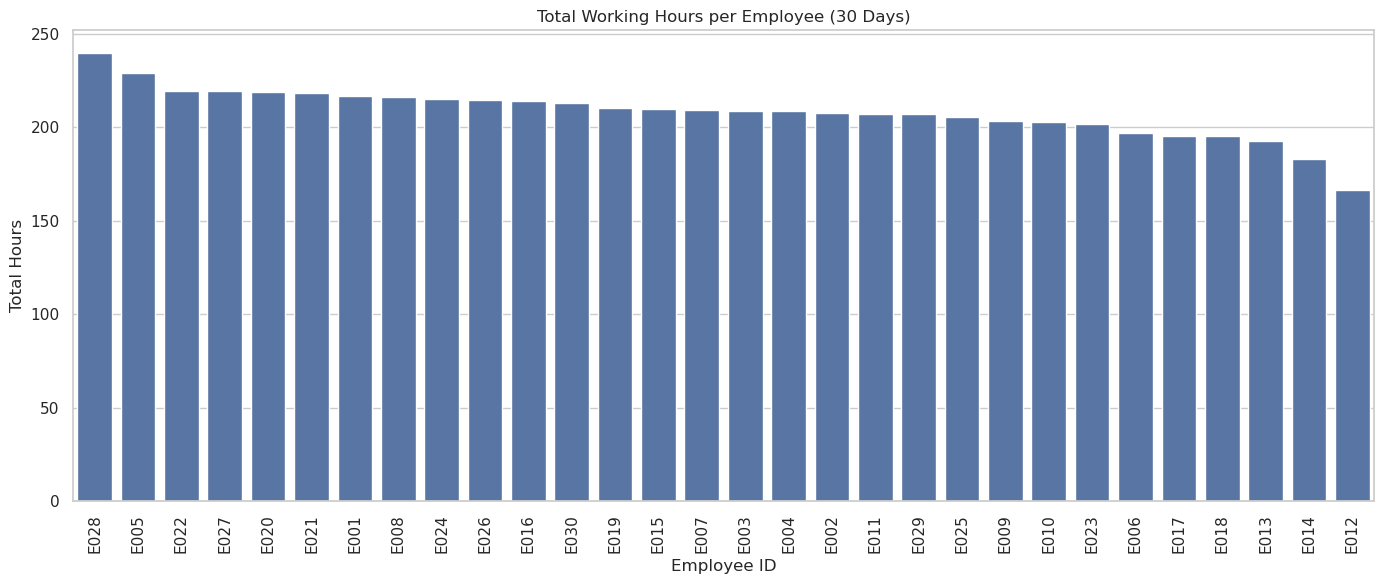

In [7]:
plt.figure(figsize=(14, 6))
sns.barplot(data=employee_summary.sort_values("TotalHours", ascending=False), x="EmployeeID", y="TotalHours")
plt.title("Total Working Hours per Employee (30 Days)")
plt.xticks(rotation=90)
plt.ylabel("Total Hours")
plt.xlabel("Employee ID")
plt.tight_layout()
plt.show()

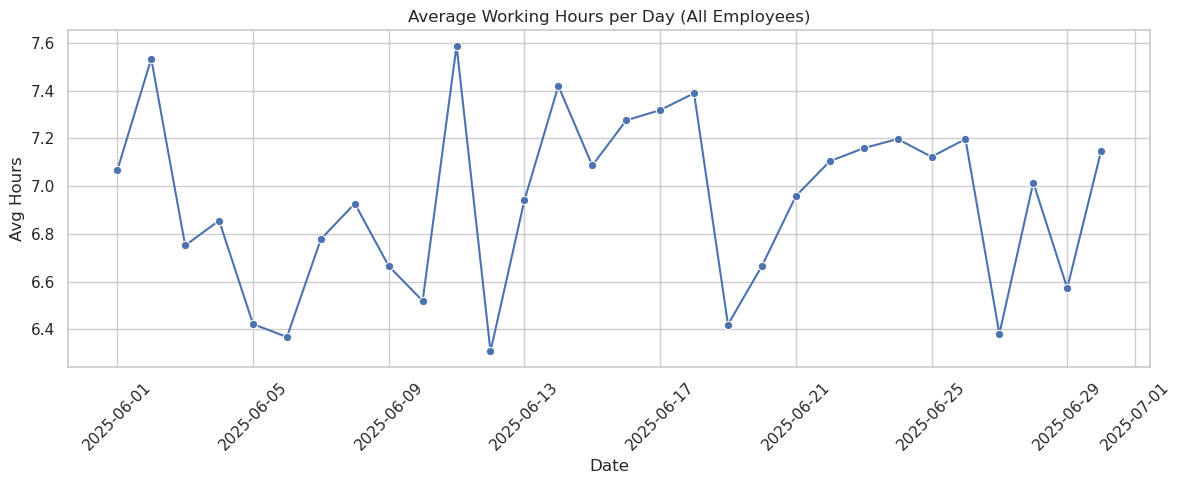

In [ ]:
daily_avg = df.groupby("Date")["WorkingHours"].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_avg, x="Date", y="WorkingHours", marker="o")
plt.title("Average Working Hours per Day (All Employees)")
plt.ylabel("Avg Hours")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

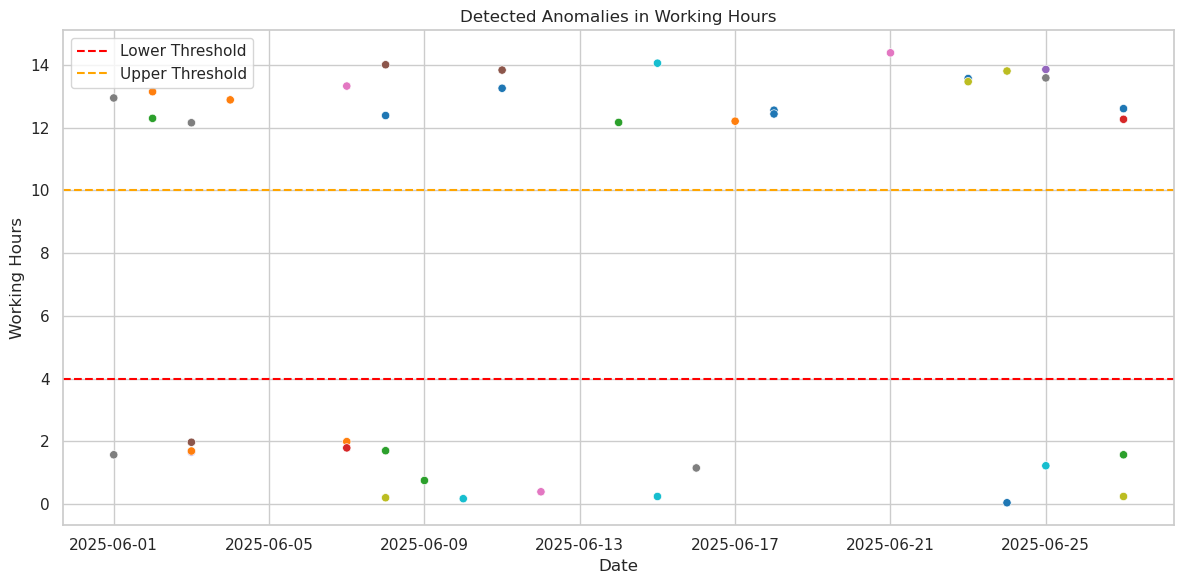

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=anomalies, x="Date", y="WorkingHours", hue="EmployeeID", palette="tab10", legend=False)
plt.title("Detected Anomalies in Working Hours")
plt.axhline(y=low_threshold, color='red', linestyle='--', label="Lower Threshold")
plt.axhline(y=high_threshold, color='orange', linestyle='--', label="Upper Threshold")
plt.ylabel("Working Hours")
plt.legend()
plt.tight_layout()
plt.show()